In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load tgt info
tgt_i = np.load('../data/ttf_rec.npy')
ttf_test = np.load('../data/ttf_test.npy')

f,a = plt.subplots(1,1,figsize=(14,5))

# Plot pic as background
img = mpimg.imread('../data/leak/screen1.png')
a.imshow(img)

# Plot target for train and test, after scaling
s = 1972 / tgt_i[-1,0]
a2 = a.twinx()
a2.plot(tgt_i[:,0] * s - 8, tgt_i[:,1], linewidth=2)
a2.plot((ttf_test[:,0] + tgt_i[-1,0]) * s, ttf_test[:,1], linewidth=2)

In [50]:
# Build test ground truth
meas = np.array([.6, .9, .8, .5, .8, 1.15, .65, .9, 1.1])
cmeas = np.cumsum(meas)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
n_test_pts = len(glob.glob('../data/test/*.csv'))*150000
ix_scale = n_test_pts / np.sum(meas) * 1.065
time_scale = tgt_i[14,1] / 1.1
ttf_test = np.zeros((len(meas)*2, 2))
for i,m in enumerate(meas):
    j = i*2
    ttf_test[j,1] = m * time_scale
    if i>0:
        ttf_test[j,0] = int(cmeas[i-1] * ix_scale) + 1
    ttf_test[j+1,0] = int(cmeas[i] * ix_scale)
np.save('../data/ttf_test.npy', ttf_test)

In [9]:
np.sum(meas)

7.4

(-300, 300)

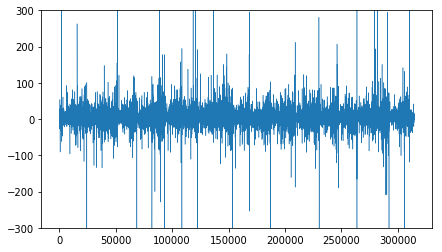

In [19]:
# Plot full train signal
sig = np.load('../data/signal.npy')[::2000]
f,a=plt.subplots(1,1,figsize=(7,4))
a.plot(np.arange(sig.size), sig, linewidth=0.5)
a.set_ylim(-300, 300)


In [80]:
sig[-20:]

array([ 8,  6,  7,  6,  2,  3,  4,  2,  2,  6,  6,  2,  3,  6,  5,  7,  9,
       10,  6,  5], dtype=int16)

In [75]:
# Load train, test and tgt
train_df = pd.read_hdf('../data/train_df.h5')
test_df = pd.read_hdf('../data/test_df.h5')
tgt = np.load('../data/target.npy')
test_df.shape, train_df.shape, tgt.shape

((2624, 150000), (4178, 150010), (4178,))

In [93]:
a = train_df.iloc[:7,:4]
b = pd.concat([a.iloc[-3:,:], a.iloc[:-3,:]], axis=0)
b.sort_index()

,0,1,2,3
0,6,8,5,8
1,5,5,6,4
2,5,7,3,5
3,4,6,6,4
4,2,1,4,3
5,8,2,-2,2
6,4,5,3,5


In [55]:
y_oof, y_tgt, y_test = np.load('../other/y_oof_.npy'), np.load('../other/y_tgt_.npy'), np.load('../other/y_pred_.npy')

In [42]:
s_feats = pd.read_hdf('../features/train_delta_v5.h5')
s_feats.head()

,mean_abs_delta
0,2.613177
1,2.701471
2,2.792686
3,2.705738
4,2.712497


2.1700759532825002

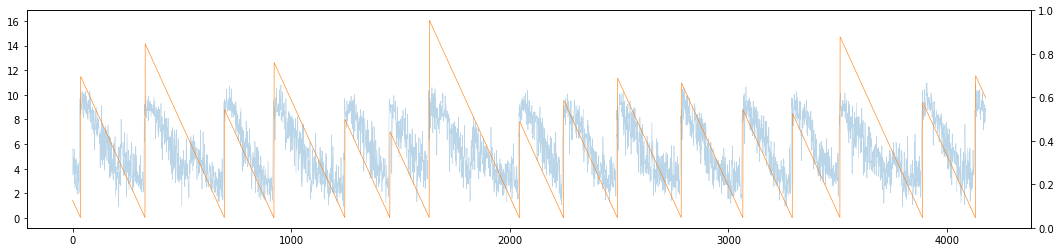

In [80]:
y_oof, y_tgt, y_test = np.load('../other/y_oof_.npy'), np.load('../other/y_tgt_.npy'), np.load('../other/y_pred_.npy')
fig,axs =plt.subplots(1,1,figsize=(18,4))
rnd = np.arange(y_oof.size)
np.random.shuffle(rnd)
axs.plot(np.arange(y_oof.size), y_oof, linewidth=0.6, alpha=0.3)
axs.plot(np.arange(y_oof.size), y_tgt, linewidth=0.6, alpha=1)
# axs.plot(np.arange(y_oof.size), y_tgt)
axs2=axs.twinx()
# axs2.plot(np.arange(y_oof.size), s_feats['mean_abs_delta'], linewidth=0.4, c='c')
from sklearn.metrics import mean_absolute_error as mae
mae(y_tgt, y_oof)

/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


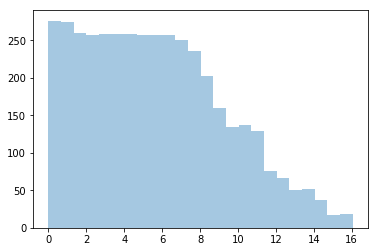

In [74]:
sns.distplot(y_tgt, kde=False)

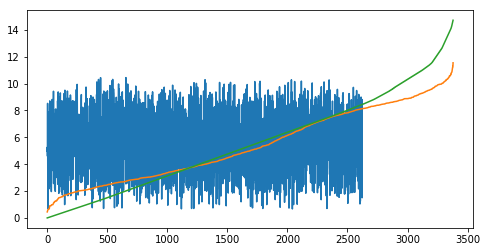

In [137]:
fig,axs =plt.subplots(1,1,figsize=(8,4))
axs.plot(np.arange(y_test.size), y_test)
axs.plot(np.arange(y_oof.size), np.sort(y_oof))
axs.plot(np.arange(y_oof.size), np.sort(y_tgt))

In [109]:
s='seg_0125d9'
sdf = pd.read_csv('../data/test/seg_0125d9.csv')
np.mean(np.abs(sdf.values))

5.19586

In [2]:
train_ttfs = tgt_i[::2, 1]
train_ttfs

array([ 1.4691    , 11.54080009, 14.18060017,  8.85669994, 12.69400024,
        8.05550003,  7.05900002, 16.10740089,  7.90560007,  9.63710022,
       11.42640018, 11.02420044,  8.8281002 ,  8.56599998, 14.75179958,
        9.45950031, 11.61859989])

In [4]:
test_ttfs = ttf_test[::2, 1]
test_ttfs

array([ 8.78585503, 13.17878255, 11.71447338,  7.32154586, 11.71447338,
       16.83955548,  9.51800962, 13.17878255, 16.10740089])

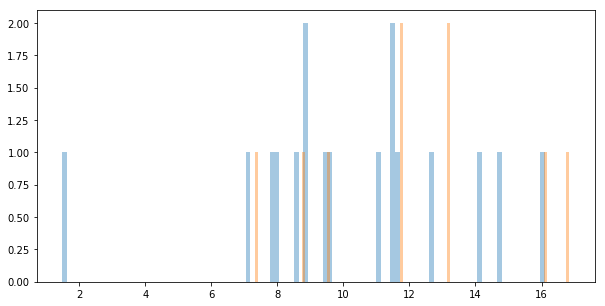

In [11]:
import seaborn as sns
f,a=plt.subplots(1,1,figsize=(10,5))
sns.distplot(train_ttfs, kde=False, bins=100, ax=a)
sns.distplot(test_ttfs, kde=False, bins=100, ax=a)

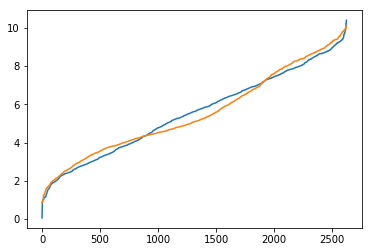

In [51]:
s1 = pd.read_csv('../submissions/lgbm_m0_v2_2.2199_pp.csv')
s2 = pd.read_csv('../submissions/lgbm_m0_v4_2.1361_pp.csv')
plt.plot(np.arange(s1.shape[0]), np.sort(s1.values[:,1]))
plt.plot(np.arange(s1.shape[0]), np.sort(s2.values[:,1]))

In [54]:
s7aeca = pd.read_csv('../data/test/seg_00030f.csv')
np.mean(s7aeca)

acoustic_data    4.49178
dtype: float64